In [68]:
import pandas as pd
import numpy as np
import math 
import matplotlib.pyplot as plt
df=pd.read_csv('soft5.csv');
from scipy.special import boxcox, inv_boxcox

df.head(10)

,Time,Fault
0,0,0
1,1,2
2,2,0
3,3,2
4,4,3
5,5,3
6,6,6
7,7,8
8,8,8
9,9,12


In [69]:
length=len(df['Fault'])
sum=0;
for i in range(1,length):
    sum= sum+df['Fault'][i]
    df['Fault'][i]=sum
    #print(sum)

df.head(10)

,Time,Fault
0,0,0
1,1,2
2,2,2
3,3,4
4,4,7
5,5,10
6,6,16
7,7,24
8,8,32
9,9,44


In [70]:
##Data Transformation when Lemda=zero
df['Fault1']=df['Fault']
df.Fault1=df.Fault1.astype(float)
df.head(10)
    

,Time,Fault,Fault1
0,0,0,0.0
1,1,2,2.0
2,2,2,2.0
3,3,4,4.0
4,4,7,7.0
5,5,10,10.0
6,6,16,16.0
7,7,24,24.0
8,8,32,32.0
9,9,44,44.0


In [71]:
length= len(df['Fault1'])
lemda = 0
for i in range(1,length):
    df['Fault1'][i] = boxcox(df['Fault1'][i] , lemda)
    

df.head(10)

<ipython-input-71-7a70db27fae9>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['Fault1'][i] = boxcox(df['Fault1'][i] , lemda)


,Time,Fault,Fault1
0,0,0,0.000000
1,1,2,0.693147
2,2,2,0.693147
3,3,4,1.386294
4,4,7,1.945910
5,5,10,2.302585
6,6,16,2.772589
7,7,24,3.178054
8,8,32,3.465736
9,9,44,3.784190


In [72]:
class LinarRegression:
    def __init__ (self,TempDataInput, TempDataFaults):
        self.TempDataInput=TempDataInput
        self.TempDataFaults=TempDataFaults
        self.predictResult=[]
        self.nextresult=[]

        
    def calculation(self):
        self.mean_x=np.mean(self.TempDataInput)
        self.mean_y=np.mean(self.TempDataFaults)
        print("MeanX and MeanY",self.mean_x,self.mean_y)
        
        self.numer=0.0
        self.dnum=0.0
        
        for i in range(len(self.TempDataInput)):
            self.numer+=(self.TempDataInput[i]-self.mean_x)*(self.TempDataFaults[i]-self.mean_y)
            self.dnum+=(self.TempDataInput[i]-self.mean_x)*(self.TempDataInput[i]-self.mean_x)
            
        self.cof_= self.numer/self.dnum
        self.intercept_=self.mean_y -(self.mean_x*self.cof_)
        
        print(f"Coefficiant {self.cof_}  and intercept {self.intercept_}")
        
        for i in self.TempDataInput:
            self.predictResult.append((i*self.cof_ +self.intercept_))
    
    def predict(self,val):
        return val*self.cof_+self.intercept_
            
            
    def DrawGraph(self):
        plt.xlabel='Year'
        plt.ylabel='Fault'
        #plt.scatter(df.Year,df.percent,color='RED', marker='+')
        plt.plot(self.TempDataInput,self.TempDataFaults,color='blue',marker='+')
        plt.plot(self.TempDataInput,self.predictResult,color='RED',marker='+')
        
    def NextPrediction(self, start, end, dist):
        ##PredictNext5data Analysis
        self.totalError=0.0;
        for i in range(start,end):
            self.temp= (i*self.cof_ +self.intercept_)
            self.nextresult.append(self.temp);
            
        self.nextresult= inv_boxcox(self.nextresult , lemda)
        
        
        for i in range(start,end):
            self.totalError+=abs(self.nextresult[i-start]-df['Fault'][i])
            print(i," act=",df['Fault'][i], "predict",self.nextresult[i-start],"RE", (abs((self.nextresult[i-start]-df['Fault'][i])))/(df['Fault'][i]))
        print("** The average Value ",self.totalError/dist )
        
        plt.xlabel='Year'
        plt.ylabel='Fault'
        #plt.scatter(df.Year,df.percent,color='RED', marker='+')
        
        
        templist=[]
        templist2=[]
        for i in range(start,end):
            templist.append(i);
            templist2.append(df['Fault'][i])
        #plt.plot(templist,templist2,color='blue',marker='+')
        #plt.plot(templist, self.revers,color='RED',marker='+')
            
                                                       
    


MeanX and MeanY 5.5 2.4210636100159126
Coefficiant 0.3991725536307272  and intercept 0.22561456504691302
11  act= 60 predict 101.1407038693965 RE 0.6856783978232751
12  act= 65 predict 150.7594030242524 RE 1.3193754311423447
13  act= 69 predict 224.7205796548367 RE 2.2568199949976333
14  act= 75 predict 334.9664293396151 RE 3.466219057861535
15  act= 85 predict 499.29787897873297 RE 4.874092693867446
** The average Value  191.37699897336674


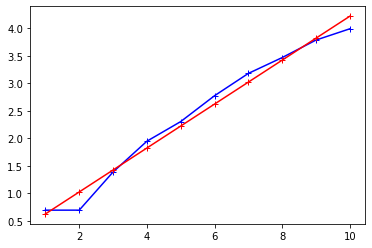

In [74]:
#################################### 10X5 ##############################
First_TenDataInput=[];
First_TenDataFults=[];
for i in range(1,11):
    First_TenDataInput.append(i)
    First_TenDataFults.append(df['Fault1'][i])

l1=LinarRegression(First_TenDataInput,First_TenDataFults);    
l1.calculation()
l1.DrawGraph()
l1.NextPrediction(11,16,5)
del l1

MeanX and MeanY 10.5 3.442126910464155
Coefficiant 0.2134544480520444  and intercept 1.2008552059176894
21  act= 126 predict 293.94674603923517 RE 1.3329106828510728
22  act= 129 predict 363.89052360136316 RE 1.8208567721035904
23  act= 131 predict 450.4772206228112 RE 2.438757409334437
24  act= 134 predict 557.6669716256737 RE 3.161693818102042
25  act= 142 predict 690.3622136812702 RE 3.86170573014979
26  act= 148 predict 854.6319045747897 RE 4.7745398957756064
27  act= 155 predict 1057.989093033333 RE 5.825736084086019
28  act= 163 predict 1309.7345359864692 RE 7.0351812023709765
29  act= 165 predict 1621.3820785595246 RE 8.826558051875907
30  act= 168 predict 2007.1852520052719 RE 10.947531261936142
** The average Value  774.6266539729742


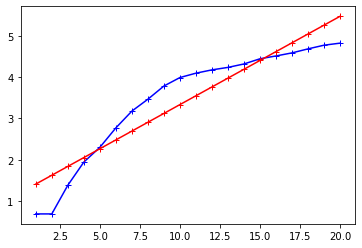

In [76]:
#################################### 20X10 ##############################
First_20DataInput=[];
First_20DataFults=[];
for i in range(1,21):
    First_20DataInput.append(i)
    First_20DataFults.append(df['Fault1'][i])

l2=LinarRegression(First_20DataInput,First_20DataFults);    
l2.calculation()
l2.DrawGraph()
l2.NextPrediction(21,31,10)
del l2

MeanX and MeanY 15.5 3.954393124871451
Coefficiant 0.13284474310289907  and intercept 1.8952996067765153
31  act= 172 predict 408.90654882955994 RE 1.3773636559858136
32  act= 175 predict 467.0009939640388 RE 1.668577108365936
33  act= 178 predict 533.3490720255113 RE 1.9963431012669175
34  act= 182 predict 609.1233986803448 RE 2.3468318608810157
35  act= 186 predict 695.6631862333988 RE 2.740124657168811
36  act= 191 predict 794.4979124572587 RE 3.1596749343311976
37  act= 195 predict 907.3743521152229 RE 3.653201805719092
38  act= 199 predict 1036.287448924937 RE 4.207474617713252
39  act= 204 predict 1183.5155735843277 RE 4.80154692933494
40  act= 205 predict 1351.6607909994068 RE 5.593467273167838
** The average Value  610.0379277814006


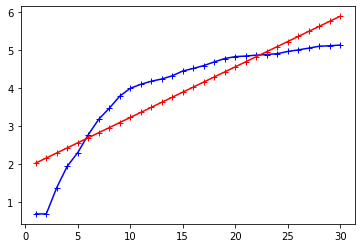

In [78]:
#################################### 30X10 ##############################
First_30DataInput=[];
First_30DataFults=[];
for i in range(1,31):
    First_30DataInput.append(i)
    First_30DataFults.append(df['Fault1'][i])

l3=LinarRegression(First_30DataInput,First_30DataFults);    
l3.calculation()
l3.DrawGraph()
l3.NextPrediction(31,41,10)
del l3

MeanX and MeanY 20.5 4.275382972307002
Coefficiant 0.09247364226749696  and intercept 2.3796733058233137
41  act= 209 predict 478.70887632545254 RE 1.2904730924662802
42  act= 217 predict 525.0882171057889 RE 1.4197613691511008
43  act= 220 predict 575.9609845961756 RE 1.618004475437162
44  act= 222 predict 631.7625209825693 RE 1.845777121543105
45  act= 228 predict 692.9703462433129 RE 2.039343623874179
46  act= 241 predict 760.1082445120644 RE 2.1539761183073214
47  act= 250 predict 833.7507463448514 RE 2.335002985379406
48  act= 256 predict 914.5280452481172 RE 2.572375176750458
49  act= 263 predict 1003.1313905408031 RE 2.8141877967330915
50  act= 266 predict 1100.3190026997115 RE 3.136537604134254
51  act= 269 predict 1206.9225618085588 RE 3.486700973266018
52  act= 273 predict 1323.85432463541 RE 3.8492832404227473
53  act= 278 predict 1452.1149312426821 RE 4.22343500447008
54  act= 284 predict 1592.8019679345457 RE 4.608457633572344
55  act= 290 predict 1747.1193598188866 RE 5.0

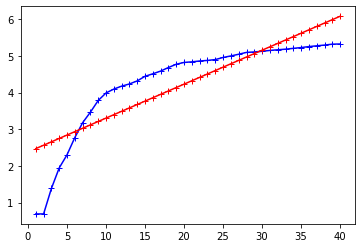

In [79]:
#################################### 40X15 ##############################
First_40DataInput=[];
First_40DataFults=[];
for i in range(1,41):
    First_40DataInput.append(i)
    First_40DataFults.append(df['Fault1'][i])

l4=LinarRegression(First_40DataInput,First_40DataFults);    
l4.calculation()
l4.DrawGraph()
l4.NextPrediction(41,56,15)
del l4